 # <center> Stock Market Prediction using Numerical and Textual Analysis </center>

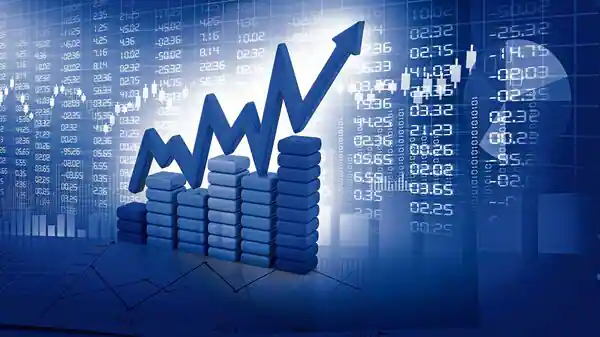

### Data Source: 

`Historical stock prices`: https://finance.yahoo.com <br>
`textual (news) data`: https://bit.ly/36fFPI6 


Yahoo Finance is a website that provides financial news and data, including historical stock prices and financial statements. The historical stock data includes information on prices, dividends and market data for various stocks and indices. <br>

`Number of Observations`: 6307 <br>
`Timespan`: July 1997 - Feb 2023 <br>
`Number of Attributes/Columns`: 7 


### Attribute Information:

##### Table: Historical Data

- `Date`: The date of the stock price or market data. <br>
- `Open`: The opening price of the stock on that day. <br>
- `High`: The highest price the stock reached on that day. <br>
- `Low`: The lowest price the stock reached on that day. <br>
- `Close`: The closing price of the stock on that day. <br>
- `Adj Close`: The adjusted closing price of the stock, taking into account any dividends, stock splits, and other corporate actions. <br>
- `Volume`: The number of shares traded on that day. <br>



##### Table:  Textual Data
- `Publish Date`: The date when the news headline was published. 
- `Headline Category`: The category of the news headline. 
- `Headline Text`: The text of the news headline. This column contains the actual headlines.


### Objective:
Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines



## 1.Loading the Data

In [1]:
import yfinance as yf
import pandas as pd
data = yf.download('^BSESN')

[*********************100%***********************]  1 of 1 completed


In [2]:
df_hist = pd.read_csv(r'C:\Users\SVF\Desktop\Stock_Market_Prediction/stock_price.csv')
df_hist.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
486,1999-07-01 00:00:00+05:30,4156.620117,4186.350098,4120.729980,4144.520020,4144.520020,0
2616,2008-01-21 00:00:00+05:30,18919.570312,18919.570312,16951.500000,17605.349609,17605.349609,35800
3791,2012-11-05 00:00:00+05:30,18749.369141,18794.630859,18683.250000,18762.869141,18762.869141,5600
1840,2004-12-06 00:00:00+05:30,6351.040039,6386.290039,6312.129883,6322.500000,6322.500000,18800
3608,2012-02-07 00:00:00+05:30,17813.740234,17832.039062,17582.490234,17622.449219,17622.449219,16800


In [3]:
df_news = pd.read_csv(r'C:\Users\SVF\Desktop\Stock_Market_Prediction/india-news-headlines.csv')
df_news.sample(5)

,publish_date,headline_category,headline_text
618017,20080913,business.india-business,Banks should display info on websites: RBI
1539097,20130112,city.kolkata,We are harassed daily: Raja Bazar Science Coll...
3136657,20190604,city.kochi,Plea seeks contempt action against power depar...
1786546,20140103,city.kozhikode,Calicut University freezes appointment notific...
208671,20030507,calcutta-times,John has Aitbaar in himself


## 2.Assessment of the data

### Types of Assessment
There are 2 types of assessment styles

- `Manual` - Looking through the data manually in google sheets
- `Programmatic` - By using pandas functions such as info(), describe() or sample()

### Steps in Assessment
There are 2 steps involved in Assessment

- Discover
- Document

### Manual Assessment

In [ ]:
# export data for manual assessment

with pd.ExcelWriter('historical_data.xlsx') as writer:
    df_hist.to_excel(writer, sheet_name='historical_data')

### Issues with the dataset

1. Dirty Data (Data with Quality issues)

    Table - `Historical Data`
        
    - Incorrect data type assigned to Date column. `validity` <br>
    
   Table - `News Data`
        
    - Incorrect data type assigned to publish date column. `validity`
    - Merge the rows based on publish date.


2. Messy Data (Data with Structural/Tidiness issues) <br>
    
   Table - `Historical Data`
        
   Table - `News Data`
        
    - Merge the rows based on publish date.

### Programatic Assessment

In [4]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6319 entries, 0 to 6318
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6319 non-null   object 
 1   Open       6319 non-null   float64
 2   High       6319 non-null   float64
 3   Low        6319 non-null   float64
 4   Close      6319 non-null   float64
 5   Adj Close  6319 non-null   float64
 6   Volume     6319 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 345.7+ KB


In [5]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [6]:
# Checking for null values
df_hist.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df_news.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [8]:
# Checking for duplicate data
df_hist.duplicated().sum()

0

In [9]:
df_news.duplicated().sum()

24860

In [10]:
df_hist.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6319.000000,6319.000000,6319.000000,6319.000000,6319.000000,6.319000e+03
mean,19778.088662,19895.365503,19623.441374,19758.166873,19758.166873,6.347530e+04
std,15701.002668,15767.390260,15604.557248,15688.010053,15688.010053,9.420558e+05
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,5100.065186,5145.150146,5048.479980,5102.435059,5102.435059,5.900000e+03
50%,17117.900391,17218.460938,17000.609375,17105.300781,17105.300781,1.180000e+04
75%,28250.309570,28383.730469,28080.379883,28223.389648,28223.389648,1.860000e+04
max,63357.988281,63583.070312,63183.769531,63284.191406,63284.191406,3.181510e+07


In [11]:
# Change the data type of Date Column
df_hist['Date'] = pd.to_datetime(df_hist['Date']).dt.date
df_hist['Date'] = df_hist['Date'].astype('datetime64[ns]')

In [12]:
# Change the data type of publish date Column
df_news['Date'] = pd.to_datetime(df_news['publish_date'], format='%Y%m%d')

In [13]:
# Drop the headline_category column
df_news.drop(['publish_date', 'headline_category'], axis = 1, inplace=True)

## 3. EDA 

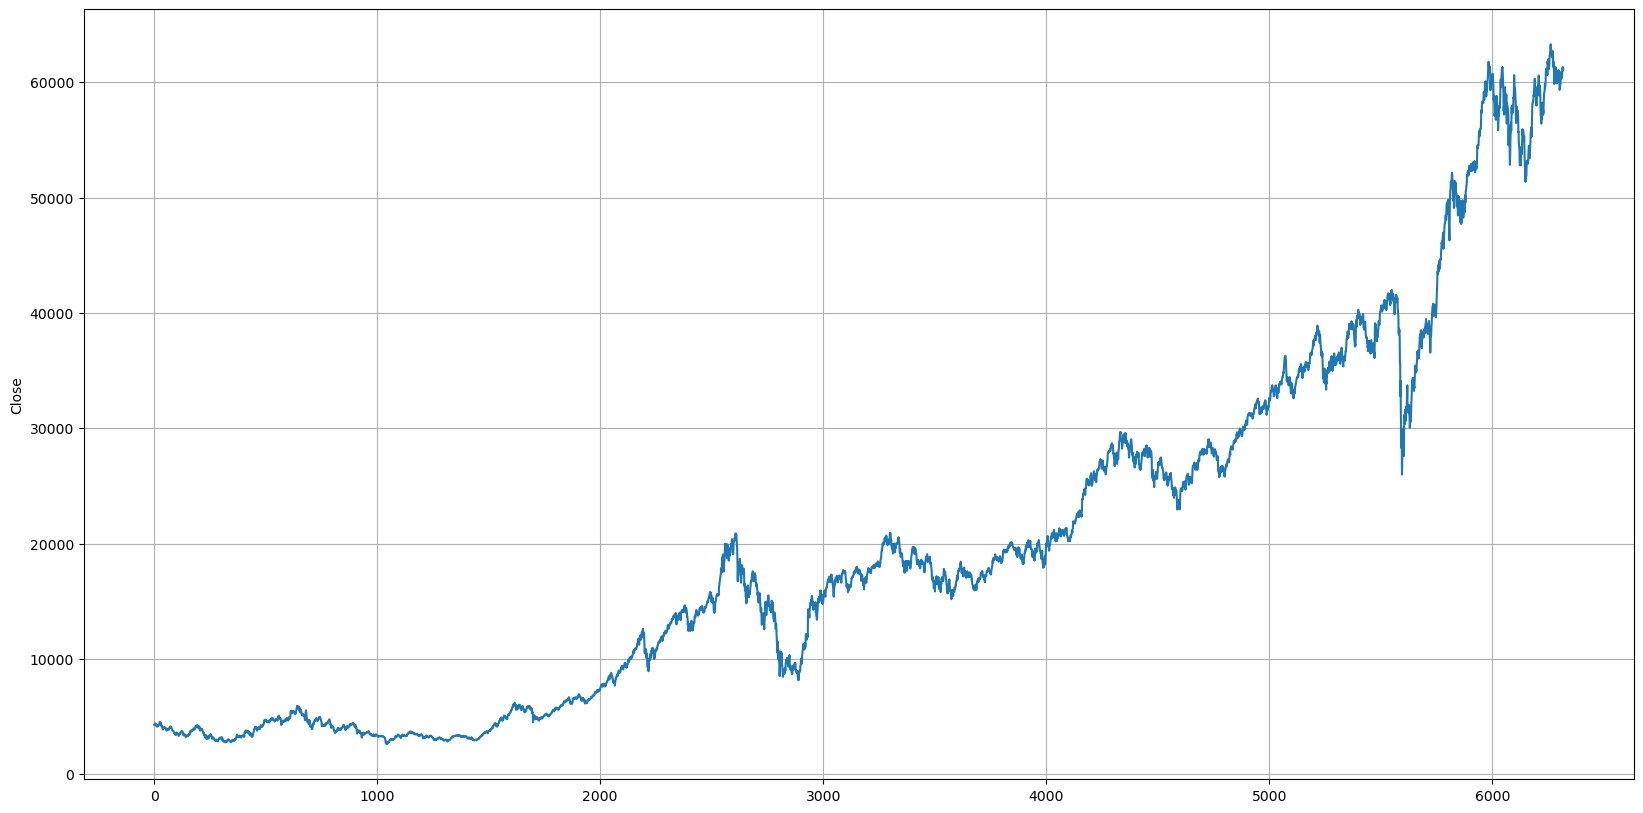

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot of the close price
plt.figure(figsize=(20,10))
df_hist['Close'].plot()

plt.grid()
plt.ylabel('Close')
plt.show()

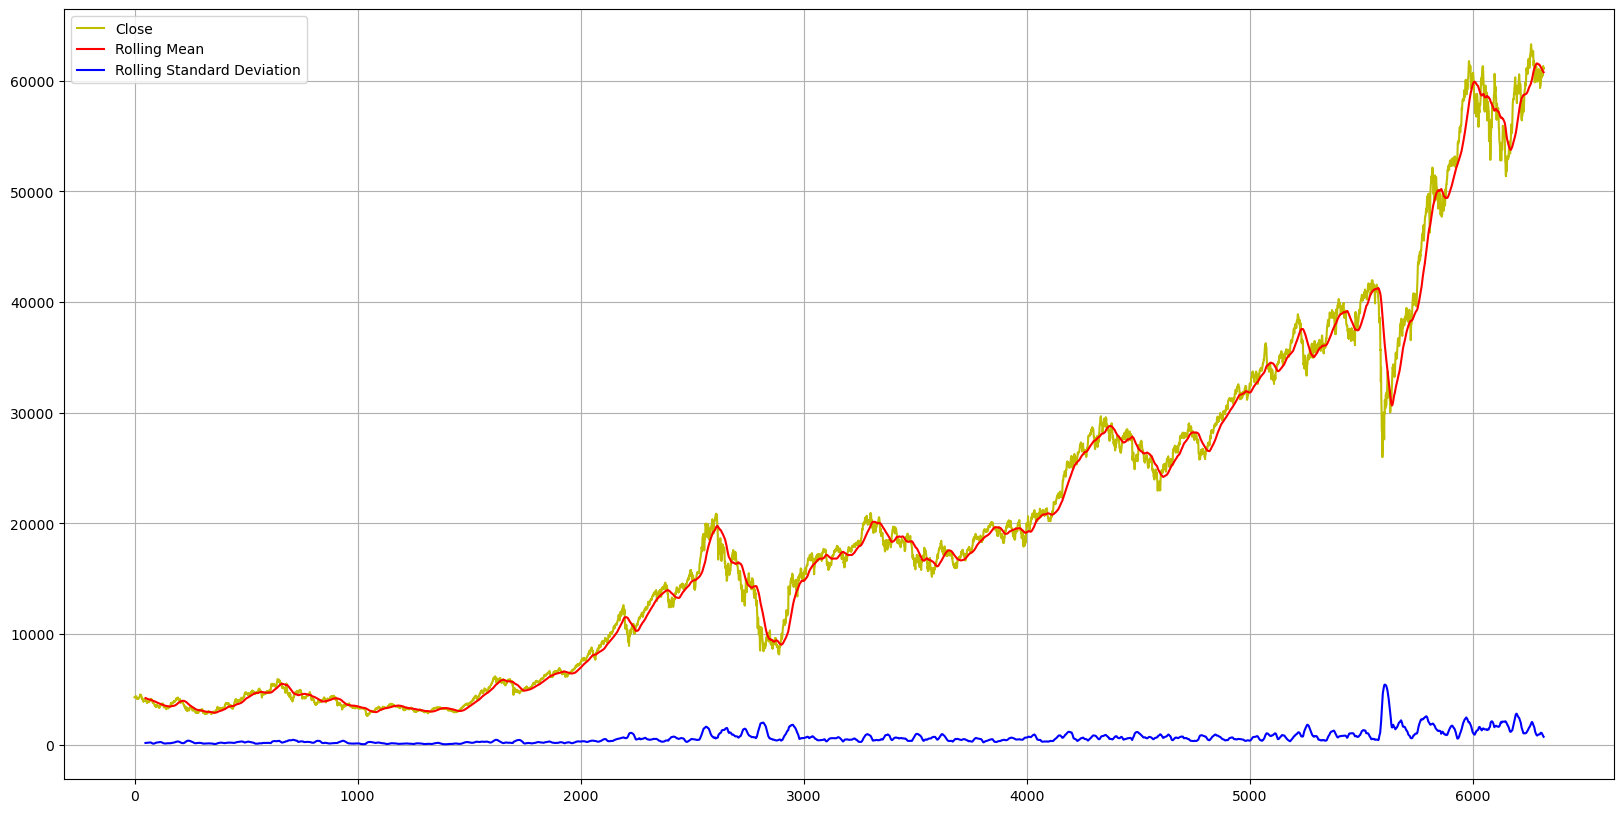

In [15]:
#Plot moving average
close = df_hist['Close']

moov_avg = close.rolling(window = 50).mean()
moov_std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
df_hist['Close'].plot(color='y',label='Close')
moov_avg.plot(color = 'r',label='Rolling Mean')
moov_std.plot(color = 'b', label = 'Rolling Standard Deviation')

plt.legend()
plt.grid()
plt.show()

## 4. Pre-processing

In [16]:
df_news['headline_text']

0          Status quo will not be disturbed at Ayodhya; s...
1                        Fissures in Hurriyat over Pak visit
2                      America's unwanted heading for India?
3                         For bigwigs; it is destination Goa
4                       Extra buses to clear tourist traffic
                                 ...                        
3650965    J&K sacks 2 cops; 3 other employees over terro...
3650966    Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967    As Covid-19 cases drop to nil in southern dist...
3650968    Tamil Nadu sees marginal rise of Covid cases w...
3650969    Tamil Nadu sees marginal rise of Covid cases w...
Name: headline_text, Length: 3650970, dtype: object

In [17]:
# preprocessing of the headline_text column
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
s = PorterStemmer()

res = []
for i in tqdm(range(0, len(df_news['headline_text']))):
    news = re.sub('[^a-zA-Z]', ' ', df_news['headline_text'][i])
    news = news.lower()
    res.append(news)

100%|█████████████████████████████████████████████████████████████████████| 3650970/3650970 [01:04<00:00, 56689.81it/s]


In [18]:
df_news['headline_text'] = pd.Series(res)
df_news.sample(10)

,headline_text,Date
2990058,men spar over tazia one killed,2018-09-23
1928327,ndmc extends taj mansingh s lease again by six...,2014-07-25
2671325,pune municipal bonds debut on bse naidu terms...,2017-06-23
1255264,pil seeks stopping of grants to english medium...,2011-11-30
3240966,new year s eve in lucknow comes at a premium,2019-12-31
2013763,jk rowling s inspiration behind harry potter,2014-11-25
3196516,no plan to ban single use plastic govt says,2019-10-02
3281766,woman seeks relief for husband who went missin...,2020-03-21
2911896,kiese thelin misses sitter as sweden are held ...,2018-06-03
956399,encounter with naxals in dantewada over,2010-08-04


In [19]:
# Grouping/Merging the rows based on publish date
df_news['headline_text'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,headline_text,Date
0,status quo will not be disturbed at ayodhya s...,2001-01-02
1,powerless north india gropes in the dark think...,2001-01-03
2,the string that pulled stephen hawking to indi...,2001-01-04
3,light combat craft takes india into club class...,2001-01-05
4,light combat craft takes india into club class...,2001-01-06
...,...,...
7712,playing a dead man in body god meant sitting i...,2022-03-27
7713,as fashion becomes democratic demand for styl...,2022-03-28
7714,bobby deol like my dad i hope to be working ...,2022-03-29
7715,i will not give in to trends dossmode the tim...,2022-03-30


### 4.1 Calculating Subjectivity and Polarity scores

In [ ]:
from textblob import TextBlob

def cal_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def cal_polarity(text):
    return  TextBlob(text).sentiment.polarity

df_news['Subjectivity'] = df_news['headline_text'].apply(cal_subjectivity)
df_news['Polarity'] = df_news['headline_text'].apply(cal_polarity)

### 4.2 Sentimental Analysis on the headline_text

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer()

df_news['Compound'] = [s.polarity_scores(i)['compound'] for i in df_news['headline_text']]
df_news['Negative'] = [s.polarity_scores(i)['neg'] for i in df_news['headline_text']]
df_news['Neutral'] = [s.polarity_scores(i)['neu'] for i in df_news['headline_text']]
df_news['Positive'] = [s.polarity_scores(i)['pos'] for i in df_news['headline_text']]

### 4.3 Merge the Historical and Text Data

In [ ]:
df_merge = pd.merge(df_hist, df_news, how='inner', on='Date')
df_merge.sample(5)

In [ ]:
# Saving the data in csv file
df_merge.to_csv('df_merge.csv')

### 5. Pre-Modelling

In [20]:
df_merge = pd.read_csv(r'C:\Users\SVF\Desktop\Stock_Market_Prediction/df_merge.csv')

In [21]:
df = df_merge[['Close', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive' ]]
df.head(1)

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,4018.879883,0.286859,0.14359,-0.9792,0.121,0.809,0.071


In [22]:
# Normalization of the data
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
ndf = pd.DataFrame(s.fit_transform(df))
ndf.index = df.index
ndf.columns = df.columns
ndf.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.023980,0.286859,0.513986,0.010401,0.272523,0.809,0.116776
1,0.024675,0.392857,0.439935,0.054503,0.351351,0.735,0.179276
2,0.025610,0.445360,0.445054,0.877194,0.234234,0.792,0.171053
3,0.026766,0.480553,0.678214,0.993700,0.310811,0.691,0.281250
4,0.025696,0.400343,0.302819,0.011051,0.272523,0.813,0.108553


In [23]:
X = ndf.drop('Close', axis=1)
y = ndf['Close']

In [28]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4164, 6) (4164,)
(1042, 6) (1042,)


## 6. Machine Learning Models

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.metrics import mean_squared_error

### 6.1 Decision Tree Regressor 

In [29]:
d_t = DecisionTreeRegressor()
d_t.fit(X_train, y_train)
pred_dt = d_t.predict(X_test)

In [30]:
print('Mean Squared Error of Decision Tree Model: ', mean_squared_error(y_test, pred_dt))

Mean Squared Error of Decision Tree Model:  0.04134656828056592


### 6.2 Random Forest Regressor

In [35]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [36]:
print('Mean Squared Error of Random Forest Model: ', mean_squared_error(y_test, pred_rf))

Mean Squared Error of Random Forest Model:  0.021417118650681403


### 6.3 XGBoost

In [37]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [38]:
print('Mean Squared Error of XGBoost Model: ', mean_squared_error(y_test, pred_xgb))

Mean Squared Error of XGBoost Model:  0.023573927080170226


## 7. Conclusion

In [44]:
from prettytable import PrettyTable
  
Table = PrettyTable(["Model", "MSE"])
  
# Add rows
Table.add_row(["Decision Tree", "0.041"])
Table.add_row(["Random Forest", "0.021"])
Table.add_row(["XGBoost", "0.0235"])

print(Table)

+---------------+--------+
|     Model     |  MSE   |
+---------------+--------+
| Decision Tree | 0.041  |
| Random Forest | 0.021  |
|    XGBoost    | 0.0235 |
+---------------+--------+


From the above results, we can see that Random Forest model performs better than other models.